## Тема разметка и извлечение именованных сущностей

### 3.1. Разметка слов с помощью частей речи (Parts-Of-Speech)

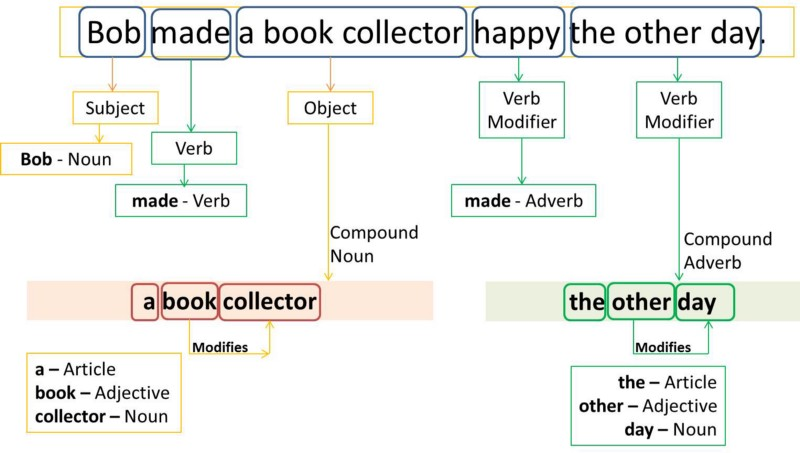

POS разметка - определение части речи и грамматических характеристик слов в тексте (корпусе) с приписыванием им соответствующих тегов. POS tagging является одним из первых этапов компьютерного анализа текста. Эта задача не простая, так как конкретное слово может иметь различную часть речи в зависимости от контекста, в котором оно используется.
Например: в предложении “Дай мне свой ответ” ответ - это существительное, а в предложении “ответь на вопрос” ответ - это глагол.

POS разметка полезна для построения деревьев синтаксического анализа, которые используются при построении NER (именованных сущностей) и извлечении отношений между словами. POS-маркировка также необходима для построения лемматизаторов.

In [11]:
#nltk.download() 
import nltk
from nltk.tokenize import word_tokenize
import matplotlib
%matplotlib inline

In [12]:
import warnings
warnings.filterwarnings("ignore")

#### Универсальный набор тегов части речи

Ниже приведена таблица POS-тэгов: обозначение, часть речи, пример. 

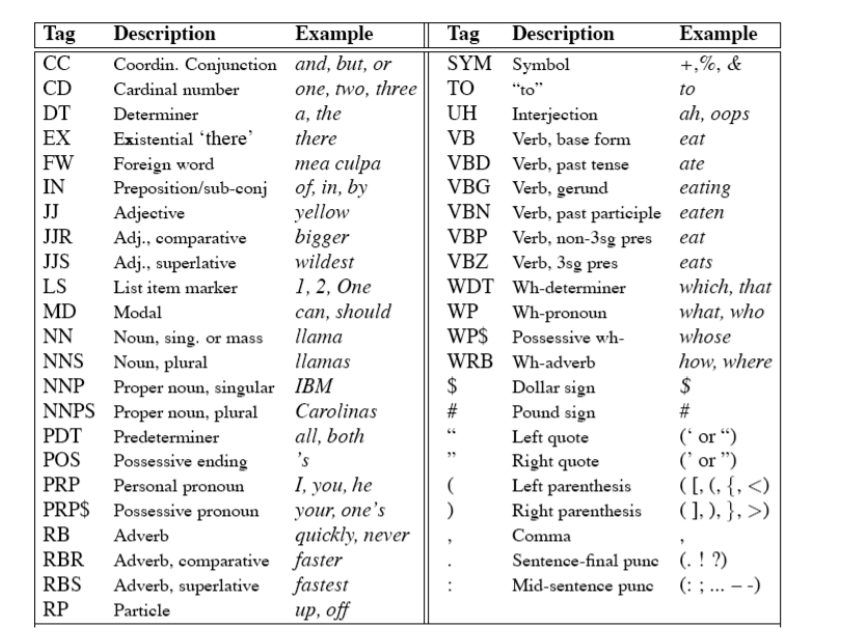

Выведим примеры тэгов разных частей речи.

In [13]:
nltk.help.upenn_tagset('RB')
nltk.help.upenn_tagset('NN')
nltk.help.upenn_tagset('VB')

RB: adverb
    occasionally unabatingly maddeningly adventurously professedly
    stirringly prominently technologically magisterially predominately
    swiftly fiscally pitilessly ...
NN: noun, common, singular or mass
    common-carrier cabbage knuckle-duster Casino afghan shed thermostat
    investment slide humour falloff slick wind hyena override subhumanity
    machinist ...
VB: verb, base form
    ask assemble assess assign assume atone attention avoid bake balkanize
    bank begin behold believe bend benefit bevel beware bless boil bomb
    boost brace break bring broil brush build ...


#### Сравнение POS тэггеров

POS-тэггер обрабатывает последовательность слов и определяет тэг части речи для каждого слова. Сравним работу нескольких тэггеров библиотеки nltk.tag. Проверять работоспособность теггеров будем на корпусе nltk.corpus.brown.

Отобразим распределение тэгов в корпусе brown. Можем видеть, что тэг "NN" наиболее популярный.

Корпус будет поделен на train и test, т.к. некоторым тэггерам необходимо обучение. Разметку визуально будем оценивать на примере test_sent, тестового предложения.

In [14]:
import nltk

In [20]:
nltk.corpus

<LazyModule 'nltk.corpus'>

In [15]:
from nltk.corpus import brown
from nltk.tag import DefaultTagger
from nltk.tag import UnigramTagger
from nltk.tag import BigramTagger, TrigramTagger
from nltk.tag import RegexpTagger

tags = [tag for (word, tag) in
brown.tagged_words(categories='news')]
nltk.FreqDist(tags)

FreqDist({'NN': 13162, 'IN': 10616, 'AT': 8893, 'NP': 6866, ',': 5133, 'NNS': 5066, '.': 4452, 'JJ': 4392, 'CC': 2664, 'VBD': 2524, ...})

In [16]:
brown_tagged_sents = brown.tagged_sents(categories='news')
train_data = brown_tagged_sents[:int(len(brown_tagged_sents) * 0.9)]
test_data = brown_tagged_sents[int(len(brown_tagged_sents) * 0.9):]
test_sent = brown.sents(categories='news')[0]
test_data[0]

[('But', 'CC'),
 ('in', 'IN'),
 ('all', 'ABN'),
 ('its', 'PP$'),
 ('175', 'CD'),
 ('years', 'NNS'),
 (',', ','),
 ('not', '*'),
 ('a', 'AT'),
 ('single', 'AP'),
 ('Negro', 'NP'),
 ('student', 'NN'),
 ('has', 'HVZ'),
 ('entered', 'VBN'),
 ('its', 'PP$'),
 ('classrooms', 'NNS'),
 ('.', '.')]

#### DefaultTagger

Очень наивный тэггер, в данном случае присваивает тэг "NN" (noun) всем словам в тексте. Т.к. в английском тексте примерно 13% сущесвительных, то получим точность тэггирования примерно 0,13.

У каждого теггера есть метод .tag(), который принимает список токенов (обычно список слов, созданных токенизатором слов), где каждый токен-это одно слово.
Метод .evaluate() оценивает точность работы тэггера.

In [17]:
default_tagger = nltk.DefaultTagger('NN')
display(default_tagger.tag(test_sent), default_tagger.evaluate(test_data))

[('The', 'NN'),
 ('Fulton', 'NN'),
 ('County', 'NN'),
 ('Grand', 'NN'),
 ('Jury', 'NN'),
 ('said', 'NN'),
 ('Friday', 'NN'),
 ('an', 'NN'),
 ('investigation', 'NN'),
 ('of', 'NN'),
 ("Atlanta's", 'NN'),
 ('recent', 'NN'),
 ('primary', 'NN'),
 ('election', 'NN'),
 ('produced', 'NN'),
 ('``', 'NN'),
 ('no', 'NN'),
 ('evidence', 'NN'),
 ("''", 'NN'),
 ('that', 'NN'),
 ('any', 'NN'),
 ('irregularities', 'NN'),
 ('took', 'NN'),
 ('place', 'NN'),
 ('.', 'NN')]

0.1262832652247583

#### UnigramTagger

UnigramTagger учитывает условную частоту тегов и предсказывает наиболее частый тег для каждого токена, не ориентируется на соседние слова.

In [18]:
unigram_tagger = UnigramTagger(train_data)
display(unigram_tagger.tag(test_sent), unigram_tagger.evaluate(test_data))

[('The', 'AT'),
 ('Fulton', 'NP-TL'),
 ('County', 'NN-TL'),
 ('Grand', 'JJ-TL'),
 ('Jury', 'NN-TL'),
 ('said', 'VBD'),
 ('Friday', 'NR'),
 ('an', 'AT'),
 ('investigation', 'NN'),
 ('of', 'IN'),
 ("Atlanta's", 'NP$'),
 ('recent', 'JJ'),
 ('primary', 'NN'),
 ('election', 'NN'),
 ('produced', 'VBD'),
 ('``', '``'),
 ('no', 'AT'),
 ('evidence', 'NN'),
 ("''", "''"),
 ('that', 'CS'),
 ('any', 'DTI'),
 ('irregularities', 'NNS'),
 ('took', 'VBD'),
 ('place', 'NN'),
 ('.', '.')]

0.8121200039868434

#### BigramTagger

BigramTagger будет учитывает тэги двух слов: текущее и предыдущее слово. Точность немного выше, чем у Unigram tagger.

In [19]:
bigram_tagger = BigramTagger(train_data, backoff=unigram_tagger)
display(bigram_tagger.tag(test_sent), bigram_tagger.evaluate(test_data))

[('The', 'AT'),
 ('Fulton', 'NP-TL'),
 ('County', 'NN-TL'),
 ('Grand', 'JJ-TL'),
 ('Jury', 'NN-TL'),
 ('said', 'VBD'),
 ('Friday', 'NR'),
 ('an', 'AT'),
 ('investigation', 'NN'),
 ('of', 'IN'),
 ("Atlanta's", 'NP$'),
 ('recent', 'JJ'),
 ('primary', 'NN'),
 ('election', 'NN'),
 ('produced', 'VBD'),
 ('``', '``'),
 ('no', 'AT'),
 ('evidence', 'NN'),
 ("''", "''"),
 ('that', 'CS'),
 ('any', 'DTI'),
 ('irregularities', 'NNS'),
 ('took', 'VBD'),
 ('place', 'NN'),
 ('.', '.')]

0.8210904016744742

#### TrigramTagger

In [20]:
trigram_tagger = TrigramTagger(train_data, backoff=bigram_tagger)
display(trigram_tagger.tag(test_sent), trigram_tagger.evaluate(test_data))

[('The', 'AT'),
 ('Fulton', 'NP-TL'),
 ('County', 'NN-TL'),
 ('Grand', 'JJ-TL'),
 ('Jury', 'NN-TL'),
 ('said', 'VBD'),
 ('Friday', 'NR'),
 ('an', 'AT'),
 ('investigation', 'NN'),
 ('of', 'IN'),
 ("Atlanta's", 'NP$'),
 ('recent', 'JJ'),
 ('primary', 'NN'),
 ('election', 'NN'),
 ('produced', 'VBD'),
 ('``', '``'),
 ('no', 'AT'),
 ('evidence', 'NN'),
 ("''", "''"),
 ('that', 'CS'),
 ('any', 'DTI'),
 ('irregularities', 'NNS'),
 ('took', 'VBD'),
 ('place', 'NN'),
 ('.', '.')]

0.8185986245390212

#### RegexpTagger

RegexpTagger работает на основе поиска совпаднения с регулярными выражениями. Пример: числа можно сопоставить с регулярным выражением "\d" для присвоения тега CD (Cardinal number) или можно сопоставить известные шаблоны слов, такие как суффикс '.*ing$'.

In [21]:
patterns = [
    (r'.*ing$', 'VBG'),                # gerunds
    (r'.*ed$', 'VBD'),                 # simple past
    (r'.*es$', 'VBZ'),                 # 3rd singular present
    (r'.*ould$', 'MD'),                # modals
    (r'.*\'s$', 'NN$'),                # possessive nouns
    (r'.*s$', 'NNS'),                  # plural nouns
    (r'^-?[0-9]+(\.[0-9]+)?$', 'CD'),  # cardinal numbers
    (r'.*', 'NN'),                      # nouns (default) 
    (r'.*ment$', 'NN'),                # i.e. wonderment 
    (r'.*ful$', 'JJ')                  # i.e. wonderful 
]
regexp_tagger = RegexpTagger(patterns)
display(regexp_tagger.tag(test_sent), regexp_tagger.evaluate(test_data))

[('The', 'NN'),
 ('Fulton', 'NN'),
 ('County', 'NN'),
 ('Grand', 'NN'),
 ('Jury', 'NN'),
 ('said', 'NN'),
 ('Friday', 'NN'),
 ('an', 'NN'),
 ('investigation', 'NN'),
 ('of', 'NN'),
 ("Atlanta's", 'NN$'),
 ('recent', 'NN'),
 ('primary', 'NN'),
 ('election', 'NN'),
 ('produced', 'VBD'),
 ('``', 'NN'),
 ('no', 'NN'),
 ('evidence', 'NN'),
 ("''", 'NN'),
 ('that', 'NN'),
 ('any', 'NN'),
 ('irregularities', 'VBZ'),
 ('took', 'NN'),
 ('place', 'NN'),
 ('.', 'NN')]

0.20253164556962025

Судя по результату, регулярных выражений в patterns не достаточно, чтобы покрыть большой процент слов корпуса.

#### Комбинация тэггеров

Примущество Backoff Tagging в том, что если текущий тэггер не знает, как тэггировать слово, он передает это следующему и так далее, пока не пройдет перебор по всем тэггерам. В данному случае тэггирование производит последовательность UnigramTagger, BigramTagger, TrigramTagger. Комбинация тэггеров дала немного лучший результат, чем UnigramTagger, BigramTagger по отдельности.

In [22]:
from nltk.tag import TrigramTagger 

def backoff_tagger(train_sents, tagger_classes, backoff=None):
    for cls in tagger_classes:
        backoff = cls(train_sents, backoff=backoff)
    return backoff


backoff = DefaultTagger('NN') 
tag = backoff_tagger(train_data,  
                     [UnigramTagger, BigramTagger, TrigramTagger],  
                     backoff = backoff) 
  
tag.evaluate(test_data) 

0.843317053722715

#### Создание тэггера имен 

Подходим к теме именнованых сущностей (NER). Мы можем самостоятельно написать необходимый тэггер. Допустим, мы хотим тэггировать имена людей в тексте. Для этого берем корпус имен (nltk.corpus.names), создаем класс тэггера, задаем логику: если слово входит в множество имен, присваиваем ему тэг имени "NNP", иначе тэг "None".

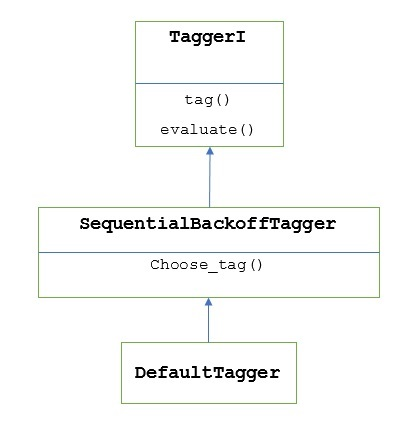

In [23]:
from nltk.tag import SequentialBackoffTagger
from nltk.corpus import names

class NamesTagger(SequentialBackoffTagger):
    def __init__(self, *args, **kwargs):
        SequentialBackoffTagger.__init__(self, *args, **kwargs)
        self.name_set = set([n.lower() for n in names.words()])
            
    def choose_tag(self, tokens, index, history):
        word = tokens[index]
        if word.lower() in self.name_set:
             return 'NNP'
        else:
             return None
            
nt = NamesTagger()
print(nt.tag(['Katya'])) 
print(nt.tag(['Adam'])) 
print(nt.tag(['Window']))            

[('Katya', 'NNP')]
[('Adam', 'NNP')]
[('Window', None)]


Разметка предложений

На вход тэггеру также можно подавать предложения, self.tag() будет применяться к каждому слову предложения.

In [24]:
bigram_tagger.tag_sents([['make', 'America', 'great', 'again'], ['winter', 'is', 'coming']])

[[('make', 'VB'), ('America', 'NP-TL'), ('great', 'JJ'), ('again', 'RB')],
 [('winter', 'NN'), ('is', 'BEZ'), ('coming', 'VBG')]]

####  Разметка корпусов

Некоторые из корпусов, включенных в NLTK, были уже размечены. Вот пример того, что вы можете увидеть, если откроете nltk.corpus.brown

In [25]:
nltk.corpus.brown.tagged_words()

[('The', 'AT'), ('Fulton', 'NP-TL'), ...]

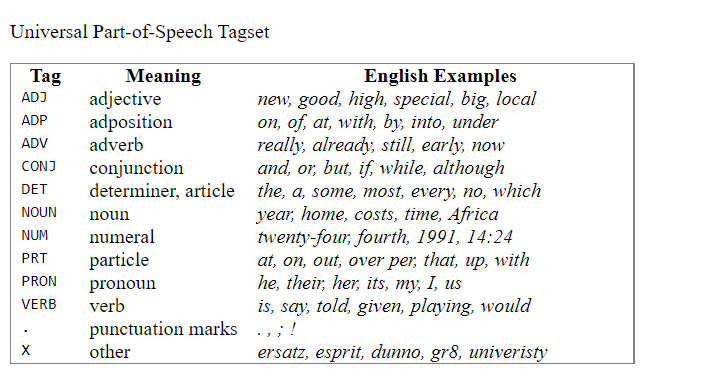

In [26]:
nltk.corpus.brown.tagged_words(tagset='universal')

[('The', 'DET'), ('Fulton', 'NOUN'), ...]

Частота частей речи в корпусе

In [27]:
brown_news_tagged = nltk.corpus.brown.tagged_words(categories='adventure', tagset='universal')
tag_fd = nltk.FreqDist(tag for (word, tag) in brown_news_tagged)
tag_fd.most_common()

[('NOUN', 13354),
 ('VERB', 12274),
 ('.', 10929),
 ('DET', 8155),
 ('ADP', 7069),
 ('PRON', 5205),
 ('ADV', 3879),
 ('ADJ', 3364),
 ('PRT', 2436),
 ('CONJ', 2173),
 ('NUM', 466),
 ('X', 38)]

In [1]:
import pyconll

In [ ]:
!wget -O ./datasets/ru_syntagrus-ud-train.conllu https://raw.githubusercontent.com/UniversalDependencies/UD_Russian-SynTagRus/master/ru_syntagrus-ud-train.conllu
!wget -O ./datasets/ru_syntagrus-ud-dev.conllu https://raw.githubusercontent.com/UniversalDependencies/UD_Russian-SynTagRus/master/ru_syntagrus-ud-dev.conllu

In [2]:
full_train = pyconll.load_from_file('datasets/ru_syntagrus-ud-train.conllu')
full_test = pyconll.load_from_file('datasets/ru_syntagrus-ud-dev.conllu')

In [4]:
for sent in full_train[:2]:
    for token in sent:
        print(token.form, token.upos)
    print()

Анкета NOUN
. PUNCT

Начальник NOUN
областного ADJ
управления NOUN
связи NOUN
Семен PROPN
Еремеевич PROPN
был AUX
человек NOUN
простой ADJ
, PUNCT
приходил VERB
на ADP
работу NOUN
всегда ADV
вовремя ADV
, PUNCT
здоровался VERB
с ADP
секретаршей NOUN
за ADP
руку NOUN
и CCONJ
иногда ADV
даже PART
писал VERB
в ADP
стенгазету NOUN
заметки NOUN
под ADP
псевдонимом NOUN
" PUNCT
Муха NOUN
" PUNCT
. PUNCT



In [3]:
fdata_train = []
for sent in full_train[:]:
    fdata_train.append([(token.form, token.upos) for token in sent])
    
fdata_test = []
for sent in full_test[:]:
    fdata_test.append([(token.form, token.upos) for token in sent])
    
fdata_sent_test = []
for sent in full_test[:]:
    fdata_sent_test.append([token.form for token in sent])

In [6]:
MAX_SENT_LEN = max(len(sent) for sent in full_train)
MAX_ORIG_TOKEN_LEN = max(len(token.form) for sent in full_train for token in sent)
print('Наибольшая длина предложения', MAX_SENT_LEN)
print('Наибольшая длина токена', MAX_ORIG_TOKEN_LEN)

Наибольшая длина предложения 205
Наибольшая длина токена 47


In [4]:
all_train_texts = [' '.join(token.form for token in sent) for sent in full_train]
all_test_texts = [' '.join(token.form for token in sent) for sent in full_test]

all_train_labels = [' '.join(token.form for token in sent) for sent in full_train]
all_test_labels = [' '.join(token.form for token in sent) for sent in full_test]
print('\n'.join(all_train_texts[:10]))

Анкета .
Начальник областного управления связи Семен Еремеевич был человек простой , приходил на работу всегда вовремя , здоровался с секретаршей за руку и иногда даже писал в стенгазету заметки под псевдонимом " Муха " .
В приемной его с утра ожидали посетители , - кое-кто с важными делами , а кое-кто и с такими , которые легко можно было решить в нижестоящих инстанциях , не затрудняя Семена Еремеевича .
Однако стиль работы Семена Еремеевича заключался в том , чтобы принимать всех желающих и лично вникать в дело .
Приемная была обставлена просто , но по-деловому .
У двери стоял стол секретарши , на столе - пишущая машинка с широкой кареткой .
В углу висел репродуктор и играло радио для развлечения ожидающих и еще для того , чтобы заглушать голос начальника , доносившийся из кабинета , так как , бесспорно , среди посетителей могли находиться и случайные люди .
Кабинет отличался скромностью , присущей Семену Еремеевичу .
В глубине стоял широкий письменный стол с бронзовыми чернильницами

In [66]:
bigram_tagger = BigramTagger(fdata_train, backoff=unigram_tagger)

In [70]:
display(bigram_tagger.tag(fdata_sent_test[100]), bigram_tagger.evaluate(fdata_test))

[('Это', 'PRON'),
 ('сочинение', None),
 ('известно', None),
 ('во', 'ADP'),
 ('многих', 'NUM'),
 ('вариантах', None),
 ('(', 'PUNCT'),
 ('самые', 'ADJ'),
 ('ранние', 'ADJ'),
 ('из', 'ADP'),
 ('них', 'PRON'),
 ('почти', 'ADV'),
 ('на', 'ADP'),
 ('сто', 'NUM'),
 ('лет', 'NOUN'),
 ('старше', 'ADJ'),
 (')', 'PUNCT'),
 ('и', 'CCONJ'),
 ('восходит', None),
 ('к', 'ADP'),
 ('ещё', None),
 ('более', 'ADV'),
 ('древним', None),
 ('рукописям', None),
 ('XVI', None),
 ('в', 'ADP'),
 ('.', 'PUNCT')]

0.6952279850369022

In [5]:
train_tok = []
train_label = []
for sent in fdata_train[:]:
    for tok in sent:
        train_tok.append(tok[0])
        train_label.append('NO_TAG' if tok[1] is None else tok[1])
        
test_tok = []
test_label = []
for sent in fdata_test[:]:
    for tok in sent:
        test_tok.append(tok[0])
        test_label.append('NO_TAG' if tok[1] is None else tok[1])

In [4]:
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
#import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

In [7]:
le = LabelEncoder()
train_enc_labels = le.fit_transform(train_label)

In [8]:
test_enc_labels = le.transform(test_label)

In [12]:
le.classes_

array(['ADJ', 'ADP', 'ADV', 'AUX', 'CCONJ', 'DET', 'INTJ', 'NOUN',
       'NO_TAG', 'NUM', 'PART', 'PRON', 'PROPN', 'PUNCT', 'SCONJ', 'SYM',
       'VERB', 'X'], dtype='<U6')

In [9]:
hvectorizer = HashingVectorizer(ngram_range=(1, 3), analyzer='char', n_features=50)

In [10]:
X_train = hvectorizer.fit_transform(train_tok)

In [11]:
X_test = hvectorizer.transform(test_tok)

In [12]:
X_train.shape

(871526, 50)

In [13]:
lr = LogisticRegression(random_state=0, max_iter=10)
lr.fit(X_train, train_enc_labels)

/home/rzaharov@mvs.local/.local/share/virtualenvs/nlp-course-A3nIyBIP/lib/python3.8/site-packages/sklearn/linear_model/logistic.py:430: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  warnings.warn("Default solver will be changed to 'lbfgs' in 0.22. "
/home/rzaharov@mvs.local/.local/share/virtualenvs/nlp-course-A3nIyBIP/lib/python3.8/site-packages/sklearn/linear_model/logistic.py:467: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  warnings.warn("Default multi_class will be changed to 'auto' in"
/home/rzaharov@mvs.local/.local/share/virtualenvs/nlp-course-A3nIyBIP/lib/python3.8/site-packages/sklearn/linear_model/logistic.py:1542: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn("'n_jobs' > 1 does not have any effect when"
/home/rzaharov@mvs.local/.local/share/virtualenvs/nl

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10,
                   multi_class='warn', n_jobs=-1, penalty='l2', random_state=0,
                   solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [15]:
pred = lr.predict(X_test)

In [19]:
accuracy_score(test_enc_labels, pred)

0.6331092238735551

### 3.4.  Извлечение именованных сущностей (NER) и отношений

Одна из самых популярных задач NLP – извлечении именованных сущностей (Named-entity recognition, NER). Задача NER – выделить спаны сущностей в тексте (спан – непрерывный фрагмент текста). Допустим, есть новостной текст, и мы хотим выделить в нем сущности (некоторый заранее зафиксированный набор — например, персоны, локации, организации, даты и так далее). Задача NER – понять, что участок текста “1 января 1997 года” является датой, “Кофи Аннан” – персоной, а “ООН” – организацией.

##### Зачем?
1.  Cтруктуризация неструктурированных данных. Пусть у вас есть какой-то текст (или набор текстов), и данные из него нужно ввести в базу данных (таблицу). 
2. Шаг в сторону “понимания” текста. Это может как иметь самостоятельную ценность, так и помочь лучше решать другие задачи NLP. Без решения задачи NER тяжело представить себе решение многих задач NLP, допустим, разрешение местоименной анафоры или построение вопросно-ответных систем. 

Пример 1: Местоименная анафора позволяет нам понять, к какому элементу текста относится местоимение. Например, пусть мы хотим проанализировать текст “Прискакал Чарминг на белом коне. Принцесса выбежала ему навстречу и поцеловала его”. Если мы выделили на слове “Чарминг” сущность Персона, то машина сможет намного легче понять, что принцесса, скорее всего, поцеловала не коня, а принца Чарминга.

Пример 2: Теперь приведем пример, как выделение именованных сущностей может помочь при построении вопросно-ответных систем. Если задать в вашем любимом поисковике вопрос «Кто играл роль Дарта Вейдера в фильме “Империя наносит ответный удар”», то с большой вероятностью вы получите верный ответ. Это делается как раз с помощью выделения именованных сущностей: выделяем сущности (фильм, роль и т. п.), понимаем, что нас спрашивают, и дальше ищем ответ в базе данных.

Для решения NER-задач существуют множество инструментов. Рассмотрим несколько из них.


#### NLTK

Для разметки NER с помощью NLTK сначала производим токенизацию слов, затем POS тэггинг. 
В качестве документа возьмем статью 'https://www.nytimes.com/2018/08/13/us/politics/peter-strzok-fired-fbi.html?hp&action=click&pgtype=Homepage&clickSource=story-heading&module=first-column-region&region=top-news&WT.nav=top-news, распарсим ее с помощью BeautifulSoup.

In [59]:
import requests
from bs4 import BeautifulSoup
import re

def url_to_string(url):
    res = requests.get(url)
    html = res.text
    soup = BeautifulSoup(html, 'html5lib')
    for script in soup(["script", "style", 'aside']):
        script.extract()
    return " ".join(re.split(r'[\n\t]+', soup.get_text()))

document = url_to_string('https://www.nytimes.com/2018/08/13/us/politics/peter-strzok-fired-fbi.html?hp&action=click&pgtype=Homepage&clickSource=story-heading&module=first-column-region&region=top-news&WT.nav=top-news')

nltk.pos_tag(nltk.word_tokenize(document))

[('F.B.I', 'NNP'),
 ('.', '.'),
 ('Agent', 'NNP'),
 ('Peter', 'NNP'),
 ('Strzok', 'NNP'),
 (',', ','),
 ('Who', 'NNP'),
 ('Criticized', 'NNP'),
 ('Trump', 'NNP'),
 ('in', 'IN'),
 ('Texts', 'NNP'),
 (',', ','),
 ('Is', 'NNP'),
 ('Fired', 'NNP'),
 ('-', ':'),
 ('The', 'DT'),
 ('New', 'NNP'),
 ('York', 'NNP'),
 ('Times', 'NNP'),
 ('SectionsSEARCHSkip', 'NNP'),
 ('to', 'TO'),
 ('contentSkip', 'VB'),
 ('to', 'TO'),
 ('site', 'NN'),
 ('indexPoliticsToday', 'JJ'),
 ('’', 'NNP'),
 ('s', 'NN'),
 ('PaperPolitics|F.B.I', 'NNP'),
 ('.', '.'),
 ('Agent', 'NNP'),
 ('Peter', 'NNP'),
 ('Strzok', 'NNP'),
 (',', ','),
 ('Who', 'NNP'),
 ('Criticized', 'NNP'),
 ('Trump', 'NNP'),
 ('in', 'IN'),
 ('Texts', 'NNP'),
 (',', ','),
 ('Is', 'VBZ'),
 ('Firedhttps', 'NNP'),
 (':', ':'),
 ('//nyti.ms/2OtNre3AdvertisementContinue', 'NN'),
 ('reading', 'VBG'),
 ('the', 'DT'),
 ('main', 'JJ'),
 ('storySupported', 'JJ'),
 ('byContinue', 'NN'),
 ('reading', 'VBG'),
 ('the', 'DT'),
 ('main', 'JJ'),
 ('storyF.B.I', 'NN'),


С помощью функции nltk.ne_chunk () (уже оттренированный классификатор) мы можем распознавать именованные сущности с помощью классификатора, который добавляет метки категорий, такие как PERSON, ORGANIZATION и GPE.

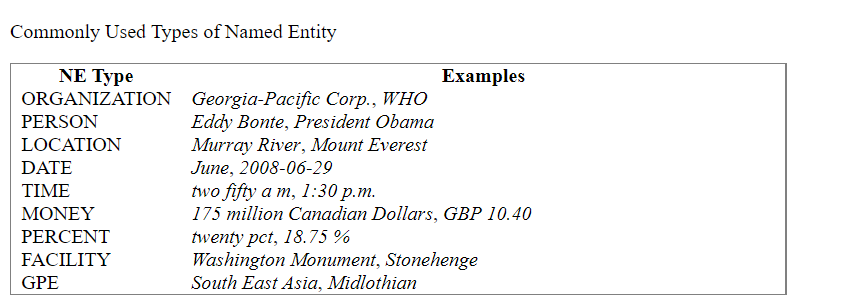

In [64]:
{(' '.join(c[0] for c in chunk), chunk.label() ) for chunk in nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(document))) if hasattr(chunk, 'label') }

{('Agent Peter Strzok', 'PERSON'),
 ('Andrew G. McCabe', 'PERSON'),
 ('Anthony D. Weiner', 'PERSON'),
 ('Army', 'ORGANIZATION'),
 ('China', 'GPE'),
 ('Christopher', 'PERSON'),
 ('Clinton', 'PERSON'),
 ('CompanyNYTCoContact', 'ORGANIZATION'),
 ('Congress', 'ORGANIZATION'),
 ('David Bowdich', 'PERSON'),
 ('Director Wray', 'PERSON'),
 ('F.B.I.', 'ORGANIZATION'),
 ('Georgetown University', 'ORGANIZATION'),
 ('Goelman', 'PERSON'),
 ('Hillary', 'ORGANIZATION'),
 ('Hillary Clinton', 'PERSON'),
 ('Horowitz', 'PERSON'),
 ('House', 'ORGANIZATION'),
 ('Hundreds', 'PERSON'),
 ('IndexSite Information', 'ORGANIZATION'),
 ('Is', 'PERSON'),
 ('Is Fired', 'PERSON'),
 ('James B. Comey', 'PERSON'),
 ('Lisa Page', 'PERSON'),
 ('March', 'GPE'),
 ('Michael E. Horowitz', 'PERSON'),
 ('Michael S. SchmidtAug', 'PERSON'),
 ('Midyear Exam', 'PERSON'),
 ('Mr.', 'PERSON'),
 ('Mr. Bowdich', 'PERSON'),
 ('Mr. Goelman', 'PERSON'),
 ('Mr. Horowitz', 'PERSON'),
 ('Mr. McCabe', 'PERSON'),
 ('Mr. Mueller', 'PERSON'),
 ('

#### Spacy

Spacy значительно быстрее NLTK, так как она написана на Cython и работает с объектами.
Для NER Spacy работает как простой классификатор (неглубокая нейронная сеть с одним скрытым слоем). Объект Doc хранит последовательности токенов и все их аннотации.

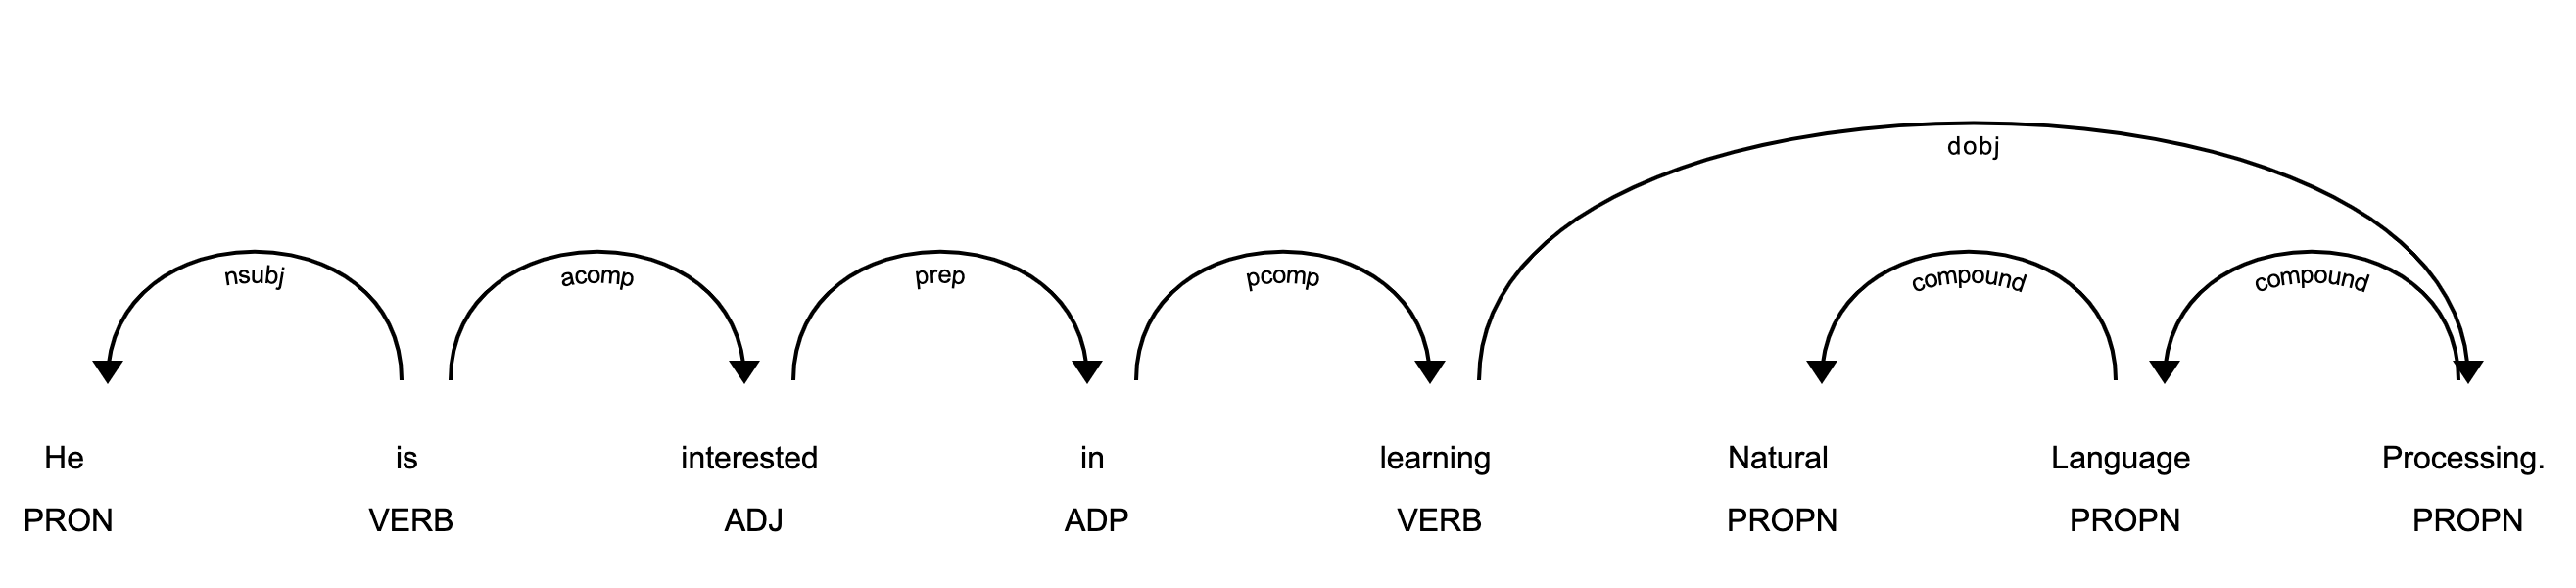

In [28]:
#!pip install -U spacy
#!python -m spacy info
import spacy
from spacy import displacy
import en_core_web_md

nlp = en_core_web_md.load()
ny_bb = url_to_string('https://www.nytimes.com/2018/08/13/us/politics/peter-strzok-fired-fbi.html?hp&action=click&pgtype=Homepage&clickSource=story-heading&module=first-column-region&region=top-news&WT.nav=top-news')
article = nlp(ny_bb)
displacy.render(article, jupyter=True, style='ent')


#### Deeppavlov

DeepPavlov-это библиотека ИИ с открытым исходным кодом, построенная на TensorFlow и Keras. DeepPavlov предназначена для разработки чат-ботов и сложных разговорных систем, исследований в области nlp и, в частности, диалоговых систем.

DeepPavlov использует несколько более новый вариант глубокой нейронной архитектуры Flair, известный как гибридная модель Bi-LSTM-CRF.


Используем предтренированную модель "ner_ontonotes_bert_mult", которая работает с разными языками, в том числе и русским. Подадим на распознование предложение на русском языке. 

In [ ]:
# !python -m venv env 
# #.\env\Scripts\activate.bat
# !pip install deeppavlov
# !python -m deeppavlov install squad_bert

#!python -m deeppavlov install ner_ontonotes
import deeppavlov
from deeppavlov import configs, build_model
deeppavlov_ner = build_model(configs.ner.ner_rus, download=True)
rus_document = "Нью-Йорк, США, 30 апреля 2020, 01:01 — REGNUM В администрации президента США Дональда Трампа планируют пройти все этапы создания вакцины от коронавируса в ускоренном темпе и выпустить 100 млн доз до конца 2020 года, передаёт агентство Bloomberg со ссылкой на осведомлённые источники"
deeppavlov_ner([rus_document])

### 3.4. Извлечение отношений

Можно извлекать не только именнованные сущности (NER), но и отношения между словами в предложении (Relation extraction).

#### Spacy

В уже знакомой нам библеотеке Spacy используем встроенные displaCy визуализатор со style="dep" для отображения отношений.

In [30]:
import spacy
from spacy import displacy
#install spacy model
#!pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_md-2.2.0/en_core_web_md-2.2.0.tar.gz
import en_core_web_md
nlp = en_core_web_md.load()
doc = nlp("I think Barack Obama met founder of Facebook at occasion of a release of a new NLP algorithm.")

displacy.render(doc, style="dep") # (1)
displacy.render(doc, style="ent") # (2)

#### NLTK. Извлечение отношений

Распарсим документ nltk.corpus.ieer.parsed_docs('NYT_19980315'), extract_rels позволяет нам выделять необходимые отношения, в данном случае мы ищем пары сущностей <'ORG', 'LOC'>. Также мы указали, что текст должен подходить под регулярное выражение IN.
IEER корпус отмаркирован для именнованных сущностей.

In [31]:
import re
import nltk
IN = re.compile(r'.*\bin\b(?!\b.+ing)')
for doc in nltk.corpus.ieer.parsed_docs('NYT_19980315'):
     for rel in nltk.sem.extract_rels('ORG', 'LOC', doc,
                                      corpus='ieer', pattern = IN):
            print(nltk.sem.rtuple(rel))

[ORG: 'WHYY'] 'in' [LOC: 'Philadelphia']
[ORG: 'McGlashan &AMP; Sarrail'] 'firm in' [LOC: 'San Mateo']
[ORG: 'Freedom Forum'] 'in' [LOC: 'Arlington']
[ORG: 'Brookings Institution'] ', the research group in' [LOC: 'Washington']
[ORG: 'Idealab'] ', a self-described business incubator based in' [LOC: 'Los Angeles']
[ORG: 'Open Text'] ', based in' [LOC: 'Waterloo']
[ORG: 'WGBH'] 'in' [LOC: 'Boston']
[ORG: 'Bastille Opera'] 'in' [LOC: 'Paris']
[ORG: 'Omnicom'] 'in' [LOC: 'New York']
[ORG: 'DDB Needham'] 'in' [LOC: 'New York']
[ORG: 'Kaplan Thaler Group'] 'in' [LOC: 'New York']
[ORG: 'BBDO South'] 'in' [LOC: 'Atlanta']
[ORG: 'Georgia-Pacific'] 'in' [LOC: 'Atlanta']


#### Allennlp

Попробовать извлекать отношения онлайн можно с помощью демо Allennlp  https://demo.allennlp.org/dependency-parsing/. 
Allen NLP предлагает две модели NER с различными архитектурами: Gated Recurrent Unit (GRU) Network, bi-LSTM-CRF model.

In [26]:
from pymorphy2 import MorphAnalyzer

In [27]:
morpher = MorphAnalyzer()

In [29]:
morpher.parse("кошка")[0]

Parse(word='кошка', tag=OpencorporaTag('NOUN,anim,femn sing,nomn'), normal_form='кошка', score=0.833333, methods_stack=((<DictionaryAnalyzer>, 'кошка', 132, 0),))

Интерфейс Natasha более многословный. Пользователь явно инициализирует компоненты: загружает предобученные эмбеддинги, передаёт их в конструкторы моделей. Сам вызывает методы segment, tag_morph, parse_syntax для сегментации на токены и предложения, анализа морфологии и синтаксиса.
Модуль извлечения именованных сущностей не зависит от результатов морфологического и синтаксического разбора, его можно использовать отдельно.

In [2]:
!pip install natasha

  Created wheel for intervaltree: filename=intervaltree-3.1.0-py2.py3-none-any.whl size=26102 sha256=aab95809656c64c394d2503bf436e657627b9875e582c40d4a82ecf0c5f46cee
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\16\85\bd\1001cbb46dcfb71c2001cd7401c6fb250392f22a81ce3722f7
Successfully built intervaltree


In [3]:
from natasha import (
    Segmenter,
    MorphVocab,
    
    NewsEmbedding,
    NewsMorphTagger,
    NewsSyntaxParser,
    NewsNERTagger,
    
    PER,
    NamesExtractor,

    Doc
)

In [4]:
segmenter = Segmenter()
morph_vocab = MorphVocab()

emb = NewsEmbedding()
morph_tagger = NewsMorphTagger(emb)
syntax_parser = NewsSyntaxParser(emb)
ner_tagger = NewsNERTagger(emb)

names_extractor = NamesExtractor(morph_vocab)

text = 'Посол Израиля на Украине Йоэль Лион признался, что пришел в шок, узнав о решении властей Львовской области объявить 2019 год годом лидера запрещенной в России Организации украинских националистов (ОУН) Степана Бандеры. Свое заявление он разместил в Twitter. «Я не могу понять, как прославление тех, кто непосредственно принимал участие в ужасных антисемитских преступлениях, помогает бороться с антисемитизмом и ксенофобией. Украина не должна забывать о преступлениях, совершенных против украинских евреев, и никоим образом не отмечать их через почитание их исполнителей», — написал дипломат. 11 декабря Львовский областной совет принял решение провозгласить 2019 год в регионе годом Степана Бандеры в связи с празднованием 110-летия со дня рождения лидера ОУН (Бандера родился 1 января 1909 года). В июле аналогичное решение принял Житомирский областной совет. В начале месяца с предложением к президенту страны Петру Порошенко вернуть Бандере звание Героя Украины обратились депутаты Верховной Рады. Парламентарии уверены, что признание Бандеры национальным героем поможет в борьбе с подрывной деятельностью против Украины в информационном поле, а также остановит «распространение мифов, созданных российской пропагандой». Степан Бандера (1909-1959) был одним из лидеров Организации украинских националистов, выступающей за создание независимого государства на территориях с украиноязычным населением. В 2010 году в период президентства Виктора Ющенко Бандера был посмертно признан Героем Украины, однако впоследствии это решение было отменено судом. '
doc = Doc(text)

In [5]:
doc.segment(segmenter)
display(doc.tokens[:5])
display(doc.sents[:5])

[DocToken(stop=5, text='Посол'),
 DocToken(start=6, stop=13, text='Израиля'),
 DocToken(start=14, stop=16, text='на'),
 DocToken(start=17, stop=24, text='Украине'),
 DocToken(start=25, stop=30, text='Йоэль')]

[DocSent(stop=218, text='Посол Израиля на Украине Йоэль Лион признался, чт..., tokens=[...]),
 DocSent(start=219, stop=257, text='Свое заявление он разместил в Twitter.', tokens=[...]),
 DocSent(start=258, stop=424, text='«Я не могу понять, как прославление тех, кто непо..., tokens=[...]),
 DocSent(start=425, stop=592, text='Украина не должна забывать о преступлениях, совер..., tokens=[...]),
 DocSent(start=593, stop=798, text='11 декабря Львовский областной совет принял решен..., tokens=[...])]

In [7]:
doc.segment(segmenter)
doc.tag_morph(morph_tagger)
doc.parse_syntax(syntax_parser)
sent = doc.sents[0]
sent.morph.print()

               Посол NOUN|Animacy=Anim|Case=Nom|Gender=Masc|Number=Sing
             Израиля PROPN|Animacy=Inan|Case=Gen|Gender=Masc|Number=Sing
                  на ADP
             Украине PROPN|Animacy=Inan|Case=Loc|Gender=Fem|Number=Sing
               Йоэль PROPN|Animacy=Anim|Case=Nom|Gender=Masc|Number=Sing
                Лион PROPN|Animacy=Anim|Case=Nom|Gender=Masc|Number=Sing
           признался VERB|Aspect=Perf|Gender=Masc|Mood=Ind|Number=Sing|Tense=Past|VerbForm=Fin|Voice=Mid
                   , PUNCT
                 что SCONJ
              пришел VERB|Aspect=Perf|Gender=Masc|Mood=Ind|Number=Sing|Tense=Past|VerbForm=Fin|Voice=Act
                   в ADP
                 шок NOUN|Animacy=Inan|Case=Acc|Gender=Masc|Number=Sing
                   , PUNCT
               узнав VERB|Aspect=Perf|Tense=Past|VerbForm=Conv|Voice=Act
                   о ADP
             решении NOUN|Animacy=Inan|Case=Loc|Gender=Neut|Number=Sing
             властей NOUN|Animacy=Inan|Case=Gen|Gender

In [8]:
sent.syntax.print()

        ┌──► Посол         nsubj
        │    Израиля       
        │ ┌► на            case
        │ └─ Украине       
        │ ┌─ Йоэль         
        │ └► Лион          flat:name
┌─────┌─└─── признался     
│     │ ┌──► ,             punct
│     │ │ ┌► что           mark
│     └►└─└─ пришел        ccomp
│     │   ┌► в             case
│     └──►└─ шок           obl
│         ┌► ,             punct
│ ┌────►┌─└─ узнав         advcl
│ │     │ ┌► о             case
│ │ ┌───└►└─ решении       obl
│ │ │ ┌─└──► властей       nmod
│ │ │ │   ┌► Львовской     amod
│ │ │ └──►└─ области       nmod
│ └─└►┌─┌─── объявить      nmod
│     │ │ ┌► 2019          amod
│     │ └►└─ год           obj
│     └──►┌─ годом         obl
│   ┌─────└► лидера        nmod
│   │ ┌►┌─── запрещенной   acl
│   │ │ │ ┌► в             case
│   │ │ └►└─ России        obl
│ ┌─└►└─┌─── Организации   nmod
│ │     │ ┌► украинских    amod
│ │   ┌─└►└─ националистов nmod
│ │   │   ┌► (             punct
│ │   └►┌─└─ ОУН   

Модуль извлечения именованных сущностей не зависит от результатов морфологического и синтаксического разбора, его можно использовать отдельно.

In [9]:
doc.tag_ner(ner_tagger)
doc.ner.print()

Посол Израиля на Украине Йоэль Лион признался, что пришел в шок, узнав
      LOC────    LOC──── PER───────                                   
 о решении властей Львовской области объявить 2019 год годом лидера 
                   LOC──────────────                                
запрещенной в России Организации украинских националистов (ОУН) 
              LOC─── ORG─────────────────────────────────────── 
Степана Бандеры. Свое заявление он разместил в Twitter. «Я не могу 
PER────────────                                ORG────             
понять, как прославление тех, кто непосредственно принимал участие в 
ужасных антисемитских преступлениях, помогает бороться с 
антисемитизмом и ксенофобией. Украина не должна забывать о 
                              LOC────                      
преступлениях, совершенных против украинских евреев, и никоим образом 
не отмечать их через почитание их исполнителей», — написал дипломат. 
11 декабря Львовский областной совет принял решение провозгласить